In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0-rc1
sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)
matplotlib 2.1.0
numpy 1.18.0
pandas 0.20.3
sklearn 0.21.3
tensorflow 2.0.0-rc1
tensorflow_core.keras 2.2.4-tf


In [12]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


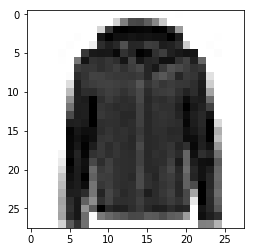

In [13]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()


show_single_image(x_train[0])

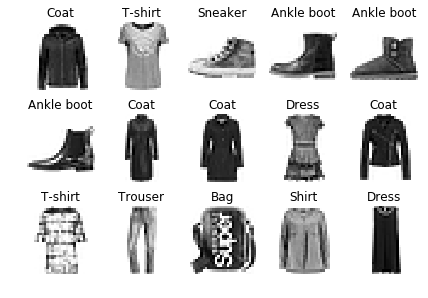

In [14]:
def show_imags(n_rows,n_cols,x_data,y_data,class_names):
   assert len(x_data)==len(y_data)
   assert n_rows*n_cols < len(x_data)
   plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
   for row in range(n_rows):
       for col in range(n_cols):
           index = n_cols*row+col
           plt.subplot(n_rows,n_cols,index+1)
           plt.imshow(x_data[index],cmap = "binary",interpolation="nearest")
           plt .axis("off")#不显示坐标尺寸
           plt.title(class_names[y_data[index]])
   plt.show()

class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt',
               'Sneaker','Bag','Ankle boot']
show_imags(3,5,x_train,y_train,class_names)


In [15]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

model.layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = keras.Sequential([
keras.layers.Flatten(input_shape = [28,28]),
keras.layers.Dense(300,activation = 'relu'),
keras.layers.Dense(100,activation = 'relu'),
keras.layers.Dense(10,activation = 'softmax')])

adam=tf.keras.optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

model.layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 58us/sample - loss: 1.6938 - accuracy: 0.8453 - val_loss: 2.3555 - val_accuracy: 0.8188
Epoch 2/10
55000/55000 [==============================] - 3s 58us/sample - loss: 1.5821 - accuracy: 0.8501 - val_loss: 2.1876 - val_accuracy: 0.8326
Epoch 3/10
55000/55000 [==============================] - 3s 59us/sample - loss: 1.4866 - accuracy: 0.8545 - val_loss: 2.1516 - val_accuracy: 0.8300
Epoch 4/10
55000/55000 [==============================] - 3s 58us/sample - loss: 1.3965 - accuracy: 0.8582 - val_loss: 2.1097 - val_accuracy: 0.8282
Epoch 5/10
55000/55000 [==============================] - 3s 58us/sample - loss: 1.3146 - accuracy: 0.8610 - val_loss: 2.0269 - val_accuracy: 0.8324
Epoch 6/10
55000/55000 [==============================] - 3s 58us/sample - loss: 1.2418 - accuracy: 0.8646 - val_loss: 2.0128 - val_accuracy: 0.8358
Epoch 7/10
55000/55000 [==============================] -

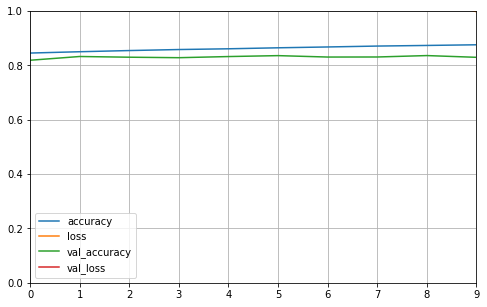

In [23]:
logdir="./callbacks"
output_model_file="{}/fashion_mnist_model.h5"
# callbacks=[keras.callbacks.TensorBoard(logdir),
#            keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
#            keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
callbacks=[keras.callbacks.TensorBoard(logdir)]

history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid), callbacks=callbacks)
print(history.history)


def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [27]:
print(history.history)

{'loss': [550107146054269.06, 2.3026916671406137, 2.302689049911499, 2.302698276172985, 2.3026913590517912, 2.3026648727763783, 2.302663513148915, 2.302685605205189, 2.3026827203924007, 2.3026994065371427], 'accuracy': [0.09869091, 0.09823637, 0.09912727, 0.099072725, 0.097763635, 0.100763634, 0.09974545, 0.09678182, 0.098127276, 0.096745454], 'val_loss': [2.3030689834594726, 2.3031083351135253, 2.303110585021973, 2.3031354000091553, 2.3032395088195803, 2.303388798904419, 2.3032322891235353, 2.303336365509033, 2.3031332313537596, 2.3032260227203367], 'val_accuracy': [0.0976, 0.098, 0.0914, 0.098, 0.0914, 0.0914, 0.098, 0.0914, 0.098, 0.0984]}
